In [1]:
# Imports
import os
import numpy as np
import pandas as pd

import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read in csv
data = pd.read_csv("Data/data.csv")
genre_data = pd.read_csv("Data/data_by_genres.csv")
year_data = pd.read_csv("Data/data_by_year.csv")
artist_data = pd.read_csv("Data/data_by_artist.csv")
genre_w_data = pd.read_csv("Data/data_w_genres.csv")

In [3]:
# Show the tail of "data"
data.tail(10)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
170643,0.9070,2020,0.00952,"['DJ Scheme', 'Cordae', 'Ski Mask The Slump Go...",0.917,228333,0.56900,1,3C9D1X8NkG2Ak1RaGpRnnQ,0.000000,7,0.0774,-10.456,1,Soda (feat. Take A Daytrip),66,2020-11-13,0.2790,144.014
170644,0.4660,2020,0.31000,['Fleet Foxes'],0.562,253613,0.68600,0,308prODCCD0O660tIktbUi,0.022500,7,0.1250,-8.480,1,Sunblind,66,2020-09-22,0.0249,103.054
170645,0.1690,2020,0.99400,['Ólafur Arnalds'],0.281,190500,0.03330,0,13MOQ6oQqkrZEDkZOHukCw,0.959000,6,0.0995,-31.460,1,We Contain Multitudes (from home),70,2020-08-26,0.0348,90.250
170646,0.5220,2020,0.20400,['Gunna'],0.598,230600,0.47200,1,2f8y4CuG57UJEmkG3ujd0D,0.000015,0,0.1080,-10.991,1,NASTY GIRL / ON CAMERA,66,2020-05-22,0.2580,120.080
170647,0.0838,2020,0.97400,['Najma Wallin'],0.175,133500,0.00759,0,6RuFOroO9VO0aMGEzirLHk,0.925000,7,0.1130,-35.072,1,Med slutna ögon,70,2020-02-21,0.0454,70.872
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.80800,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.75300,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.85800,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.62300,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055
170652,0.6420,2020,0.13200,"['KEVVO', 'J Balvin']",0.856,189507,0.72100,1,7HmnJHfs0BkFzX4x8j0hkl,0.004710,7,0.1820,-4.928,1,Billetes Azules (with J Balvin),74,2020-10-16,0.1080,94.991


In [4]:
#Show all of the data types for "data"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [5]:
# Show the head of "genre_data"
genre_data.head(10)

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
5,1,abstract,0.459210,0.516167,3.431965e+05,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1
6,1,abstract beats,0.342147,0.623000,2.299362e+05,0.527800,0.333603,0.099653,-7.918000,0.116373,112.413800,0.493507,58.933333,10
7,1,abstract hip hop,0.243854,0.694571,2.318492e+05,0.646235,0.024231,0.168543,-7.349328,0.214258,108.244987,0.571391,39.790702,2
8,0,accordeon,0.323000,0.588000,1.640000e+05,0.392000,0.441000,0.079400,-14.899000,0.072700,109.131000,0.709000,39.000000,2
9,1,accordion,0.446125,0.624812,1.670616e+05,0.373437,0.193738,0.160300,-14.487063,0.078537,112.872438,0.658688,21.937500,2


In [6]:
# Show all of the data types for "genre_data"
genre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [7]:
# Check for nulls
data.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [8]:
# Check for duplicates
data['name'].nunique(), data.shape

(133638, (170653, 19))

In [9]:
# Drop duplicate songs
data.drop_duplicates(subset=['name'], keep='first', inplace=True)
# Check for duplicates
data['name'].nunique(), data.shape

(133638, (133638, 19))

In [10]:
# Drop unimportant columns from dataset "data"
data = data.drop(columns=['release_date', 'id'], axis=1)
# Reset index
data.reset_index(drop=True)
data.sort_index()
# Show data datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133638 entries, 0 to 170652
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           133638 non-null  float64
 1   year              133638 non-null  int64  
 2   acousticness      133638 non-null  float64
 3   artists           133638 non-null  object 
 4   danceability      133638 non-null  float64
 5   duration_ms       133638 non-null  int64  
 6   energy            133638 non-null  float64
 7   explicit          133638 non-null  int64  
 8   instrumentalness  133638 non-null  float64
 9   key               133638 non-null  int64  
 10  liveness          133638 non-null  float64
 11  loudness          133638 non-null  float64
 12  mode              133638 non-null  int64  
 13  name              133638 non-null  object 
 14  popularity        133638 non-null  int64  
 15  speechiness       133638 non-null  float64
 16  tempo             13

In [11]:
# Show data
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,Gati Bali,5,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,Danny Boy,3,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,0.0380,101.665


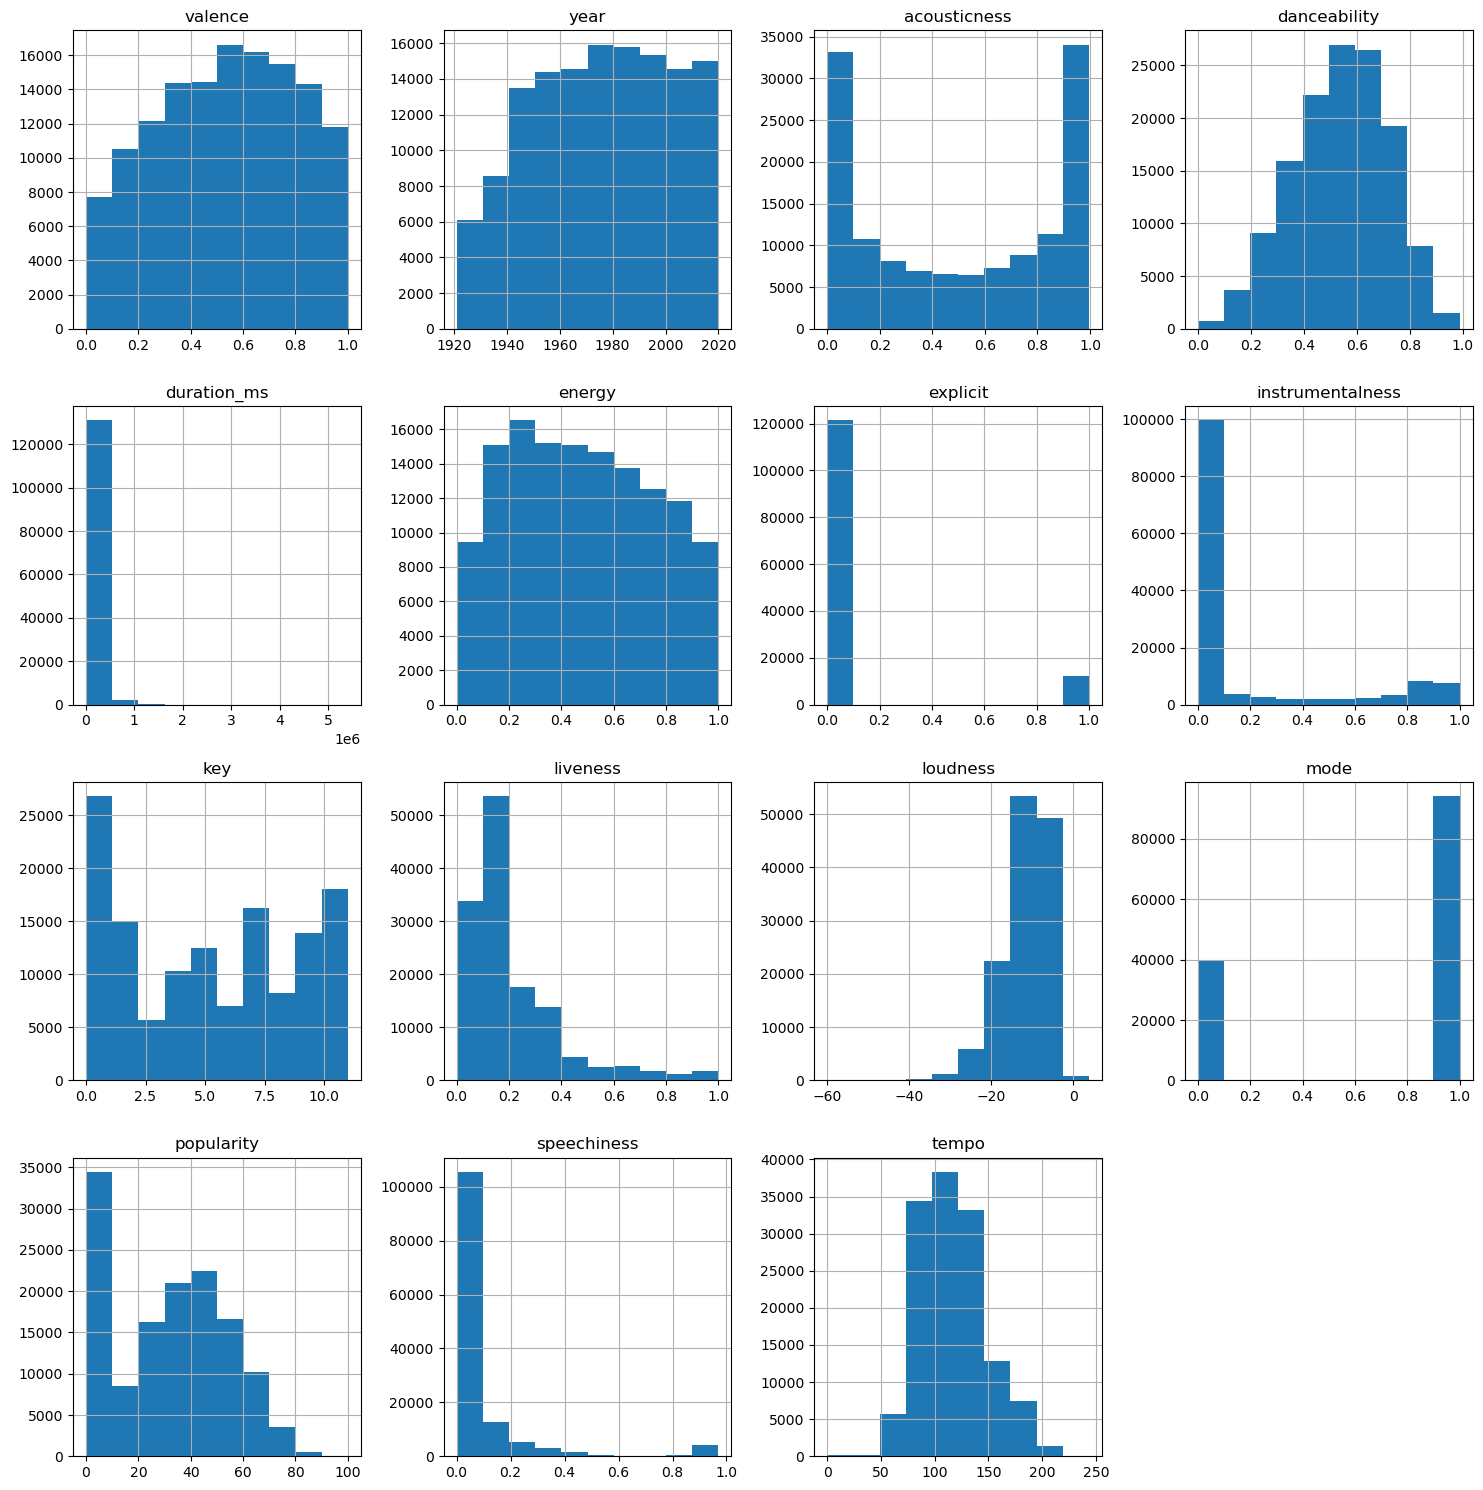

In [14]:
# Make histo grahps from data to compare data
data.hist(figsize=(15,15))

# Show the graphs
plt.tight_layout()
plt.show()